In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
cor_2= ["#FA8072", "#8B4513"]
cor = sns.color_palette("pink", 5)


In [2]:
#Leitura do DataFrame
Perf_Stud = 'StudentsPerformance.csv'

# Leitura do arquivo CSV
df_perf_stud = pd.read_csv(Perf_Stud)

#Imprimir na tela o DataFrame
display(df_perf_stud.head())




,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
#Informações DataFrame

total_linhas = df_perf_stud.shape[0]

total_colunas = df_perf_stud.shape[1]

tipos_de_variaveis =df_perf_stud.dtypes

estat_descrit = df_perf_stud.describe()


print(f"Total de linhas do DataFrame:{total_linhas} \n")

print(f"Total de Colunas do DataFrame:{total_colunas} \n")

print(f"Tipos das variáveis do DataFrame:\n{tipos_de_variaveis} \n")

print(f"Estatística Descritiva do DataFrame: \n{estat_descrit}")



Total de linhas do DataFrame:1000 

Total de Colunas do DataFrame:8 

Tipos das variáveis do DataFrame:
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object 

Estatística Descritiva do DataFrame: 
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [4]:
#Ajustes no DataFrame

novo_nome_colunas= {'gender': 'Gênero',
                    'race/ethnicity': 'Raça/Etnia',
                    'parental level of education': 'Escolaridade dos Pais',
                    'lunch': 'Almoço',
                    'test preparation course': 'Preparatório',
                    'math score': 'Nota Matemática',
                    'reading score': 'Nota Leitura',
                    'writing score': 'Nota Escrita'}


df_perf_stud= df_perf_stud.rename(columns=novo_nome_colunas)

df_perf_stud = df_perf_stud.replace({"female": "Mulher",
                 "male": "Homem",
                 "group A": "Grupo A",
                 "group B": "Grupo B",
                 "group C": "Grupo C",
                 "group D": "Grupo D",
                 "group E": "Grupo E",
                 "bachelor's degree": "Bacharelado",
                 "some college": "Superior Incompleto",
                 "master's degree": "Mestrado",
                 "associate's degree": "Tecnólogo",
                 "high school": "Ensino Médio Completo",
                 "some high school": "Ensino Médio Incompleto",
                 "standard": "Normal",
                 "free/reduced": "Gratuito/com Desconto",
                 "none": "Nenhum",
                 "completed": "Completo"
                 })

display(df_perf_stud.head())






,Gênero,Raça/Etnia,Escolaridade dos Pais,Almoço,Preparatório,Nota Matemática,Nota Leitura,Nota Escrita
0,Mulher,Grupo B,Bacharelado,Normal,Nenhum,72,72,74
1,Mulher,Grupo C,Superior Incompleto,Normal,Completo,69,90,88
2,Mulher,Grupo B,Mestrado,Normal,Nenhum,90,95,93
3,Homem,Grupo A,Tecnólogo,Gratuito/com Desconto,Nenhum,47,57,44
4,Homem,Grupo C,Superior Incompleto,Normal,Nenhum,76,78,75


Grupo A     89
Grupo B    190
Grupo C    319
Grupo D    262
Grupo E    140
Name: Raça/Etnia, dtype: int64 



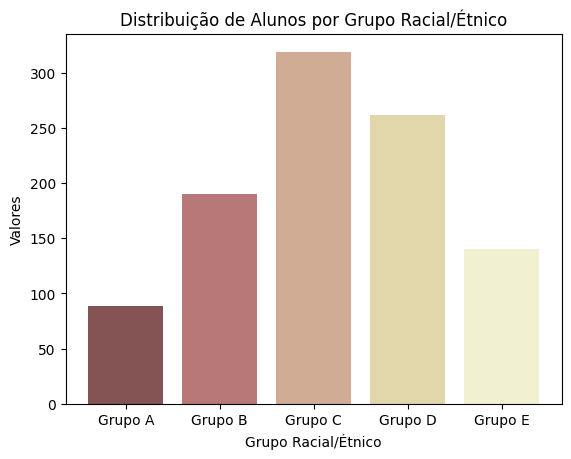

In [5]:
#Quantidade de alunos em cada grupo racial/étnico

qtd_etnia = df_perf_stud['Raça/Etnia'].value_counts().sort_index()
index= qtd_etnia.index

print(qtd_etnia, '\n')


plt.bar(index, qtd_etnia, color=cor)
plt.xlabel('Grupo Racial/Étnico')
plt.ylabel('Valores')
plt.title('Distribuição de Alunos por Grupo Racial/Étnico')
plt.show()

Homem     482
Mulher    518
Name: Gênero, dtype: int64


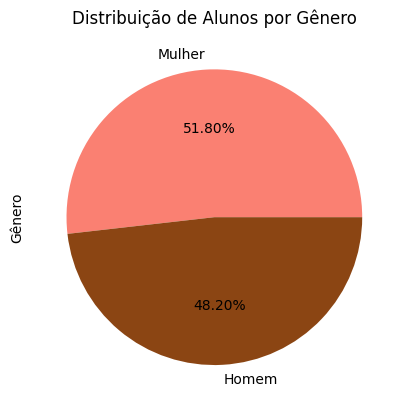

In [6]:
#Quantidade de alunos em cada gênero

qtd_por_grupo = df_perf_stud['Gênero'].value_counts().sort_index()
print(qtd_por_grupo)


df_perf_stud['Gênero'].value_counts().plot(kind='pie', autopct='%.2f%%', colors=cor_2)

plt.title('Distribuição de Alunos por Gênero')

plt.show()


É possível observar no gráfico acima que na base existem mais alunos do gênero feminino.

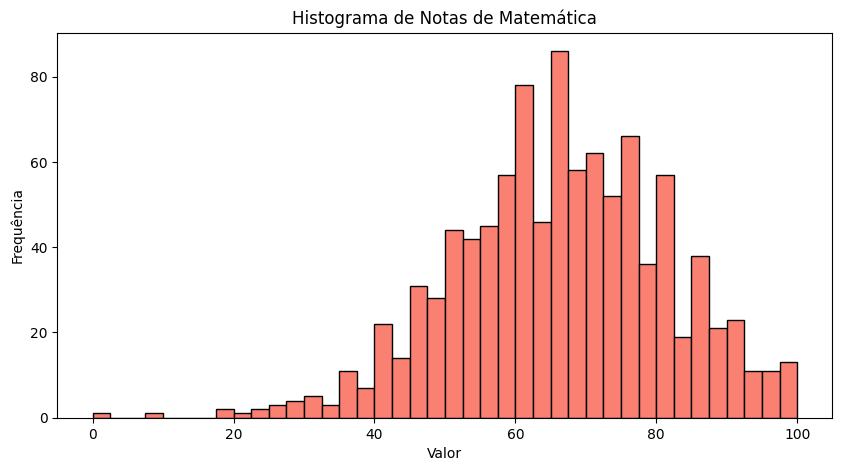

In [8]:
#Analise as notas de matemática dos alunos

plt.figure(figsize=(10, 5))
plt.hist(df_perf_stud['Nota Matemática'], bins= 40, edgecolor='black', color= '#FA8072')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.title('Histograma de Notas de Matemática')
plt.show()


É possível observar no histograma acima com relação as notas de matemática, é um histograma bimodal. Esse histograma possui dois pontos mais altos em pontos diferentes do gráfico. Isso indica que existe mais de uma frequência alta nas notas de matemática. Temos um pico em torno de notas com valor de 65-66 pontos e outro pico em notas com valor de 75-76 pontos.


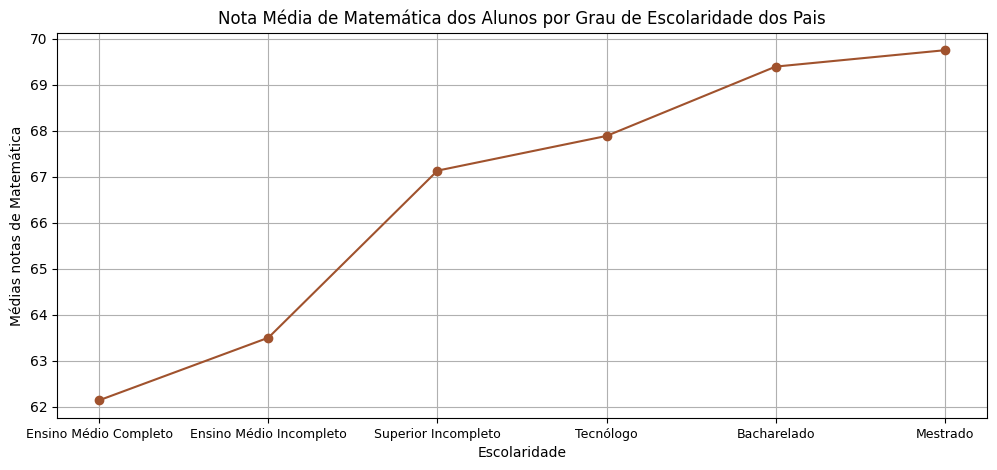

In [9]:
# Notas de matemática por grau de escolaridade dos pais

media_esc_notmat = df_perf_stud.groupby('Escolaridade dos Pais')['Nota Matemática'].mean()
media_esc_notmat_order = media_esc_notmat.sort_values()
index= media_esc_notmat_order.index

plt.figure(figsize=(12, 5))
plt.plot(index, media_esc_notmat_order, marker='o', color= '#A0522D', linestyle='-')
plt.xticks(fontsize=9)
plt.grid(True)
plt.xlabel('Escolaridade')
plt.ylabel('Médias notas de Matemática')
plt.title('Nota Média de Matemática dos Alunos por Grau de Escolaridade dos Pais')
plt.show()

É possível observar no gráfico acima que as maiores notas médias de matemática foram obtidas por alunos com pais com maior grau de escolaridade.

<ipython-input-10-284a30bff335>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  media_nota = df_perf_stud.groupby('Preparatório')['Nota Matemática', 'Nota Leitura', 'Nota Escrita'].mean()


<Figure size 1000x800 with 0 Axes>

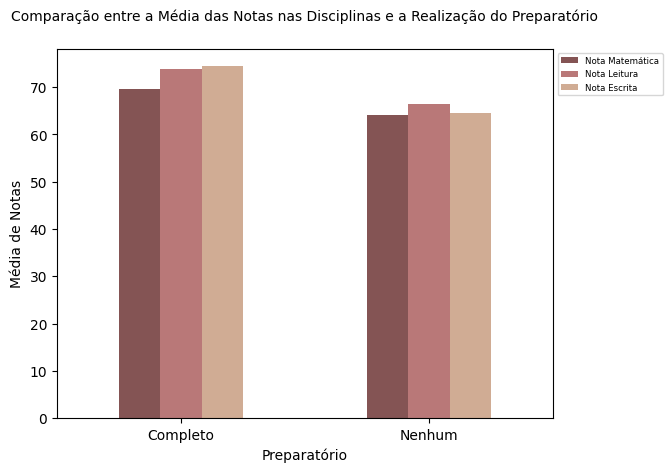

In [10]:
# Influência de curso preparatório com as notas obtidas

media_nota = df_perf_stud.groupby('Preparatório')['Nota Matemática', 'Nota Leitura', 'Nota Escrita'].mean()
media_nota= round(media_nota,2)
index= media_nota.index

plt.figure(figsize=(10,8))
media_nota.plot(kind='bar', color= cor)
plt.title('Comparação entre a Média das Notas nas Disciplinas e a Realização do Preparatório', fontsize=10, pad=20)
plt.xlabel('Preparatório')
plt.ylabel('Média de Notas')
plt.xticks(rotation=0)
plt.legend( fontsize=6.2, loc='upper right', bbox_to_anchor=(1.23,1.00), ncol=1)
plt.show()

Através do gráfico é possível observar que alunos que completaram o curso preparatório tiveram melhor desempenho em todas as disciplinas.